# #2: Graphical Equation Solver

Enter your first expression in terms of x and y: 2*x + 3*y + 5
Enter your second expression in terms of x and y: 3*x + 2*y + 10
                            
Solution:	x: [{x: -4, y: 1}]


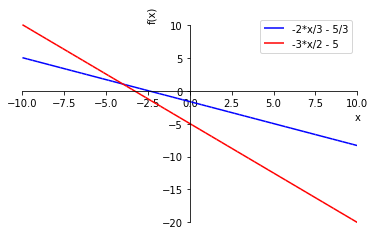

In [20]:
from sympy import Symbol, sympify, solve, SympifyError, pprint
from sympy.plotting import plot


def find_solutions(expr1, expr2):
    """
    Finds solution for two expressions.
    
    :param expr1: first expression
    :param expr2: second expression
    :returns: None
    """    
    solution = solve((expr1, expr2), dict=True)
    if solution:
        pprint(f'\nSolution:\tx: {solution}')
    else:
        print('No solution found')
    
    
def plot_expressions(expr1, expr2):
    """
    Draws plot for two expressions
    
    :param expr1: first expression
    :param expr2: second expression
    :returns: None
    """    
    solutions_expr1 = solve(expr1, 'y')
    solutions_expr2 = solve(expr2, 'y')
    p = plot(solutions_expr1[0], solutions_expr2[0], legend=True, show=False)
    p[0].line_color = 'b'
    p[1].line_color = 'r'
    p.show()
    
    
def validate_expression(expr):
    """
    Validates expression. Each expression should have
    x and y variables
    
    :param expr: expression to be valiated
    :returns: True
    :raises ValueError
    """
    y = Symbol('y')
    x = Symbol('x')
    expr_symbols = expr.atoms(Symbol)
    
    if len(expr_symbols) > 2:
        raise ValueError(f'The equation "{expr}" must have only two variables - x and y')
    elif x not in expr_symbols or y not in expr_symbols:
        raise ValueError(f'Equation "{expr}" must have only x and y variables')
    else:
        return True
        
        
if __name__ == '__main__':
    
    try:
        expr1 = input('Enter your first expression in terms of x and y: ')
        expr2 = input('Enter your second expression in terms of x and y: ')

        expr1 = sympify(expr1)
        expr2 = sympify(expr2)            

        validate_expression(expr1)
        validate_expression(expr2)
    except SympifyError as ex:
        print(f'Invalid input: {ex}')
    else:
        find_solutions(expr1, expr2)
        plot_expressions(expr1, expr2)